In [1]:
import os, sys, math, resource, random, subprocess
from pathlib import Path
import numpy as np
import pandas
from pandas import DataFrame, Series

In [2]:
%matplotlib inline

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
#from mpl_toolkits.basemap import Basemap

matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

import mpld3

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")

# lowess for plotting
from statsmodels.nonparametric.smoothers_lowess import lowess

In [3]:
class MidpointNormalize(matplotlib.colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work
    there way either side from a prescribed midpoint value)
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

# Population size reduction

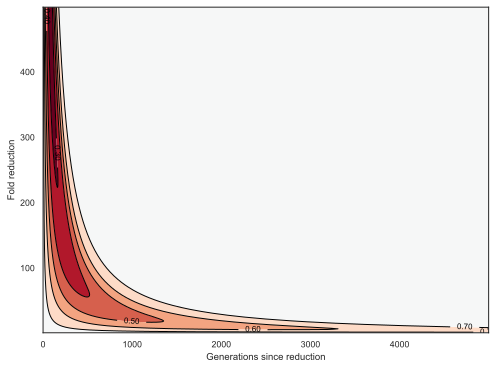

In [4]:
h = 0.75
N = 1e4 / 2
g = np.arange(0, 5e3)
f = 1 / np.arange(1, 500)

def reduction(g, f):
    return (2*N*h * (f - (f - 1) * np.exp(-g/(2*N*h*f)))) / \
           (2*N *   (f - (f - 1) * np.exp(-g/(2*N*  f)))) 

gg, ff = np.meshgrid(g, f, sparse=True)
z = reduction(gg, ff)

with sns.axes_style('white'):
    levels=np.arange(0, 1.1, 0.1)
    plt.contourf(g, 1/f, z, cmap="RdBu", levels=levels, norm=MidpointNormalize(midpoint=0.75,vmin=0.25, vmax=1))
    CS = plt.contour(g, 1/f, z, colors='k', linewidths=1, levels=levels)
    plt.clabel(CS, CS.levels, fmt='%.2f', fontsize=8)
    plt.ylabel("Fold reduction")
    plt.xlabel("Generations since reduction")

# Population size increase

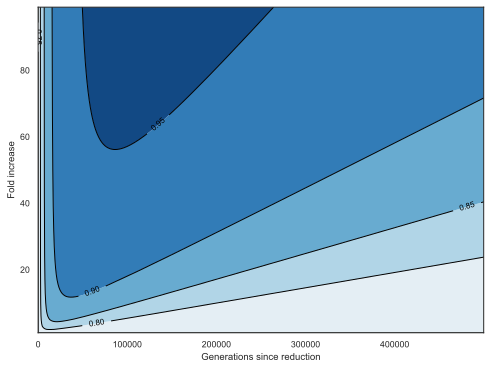

In [5]:
h = 0.75
N = 1e4 / 2
g = np.arange(0, 5e5, 100)
f = np.arange(1, 100)

def increase(g, f):
    return (2*N*h * (f - (f - 1) * np.exp(-g/(2*N*h*f)))) / \
           (2*N *   (f - (f - 1) * np.exp(-g/(2*N*  f)))) 

gg, ff = np.meshgrid(g, f, sparse=True)
z = reduction(gg, ff)

with sns.axes_style('white'):
    levels=np.arange(0, 1.1, 0.05)
    plt.contourf(g, f, z, cmap="RdBu", levels=levels, norm=MidpointNormalize(midpoint=0.75,vmin=0.25, vmax=1))
    CS = plt.contour(g, f, z, colors='k', linewidths=1, levels=levels)
    plt.clabel(CS, CS.levels, fmt='%.2f', fontsize=8)
    plt.ylabel("Fold increase")
    plt.xlabel("Generations since reduction")

# Bottleneck

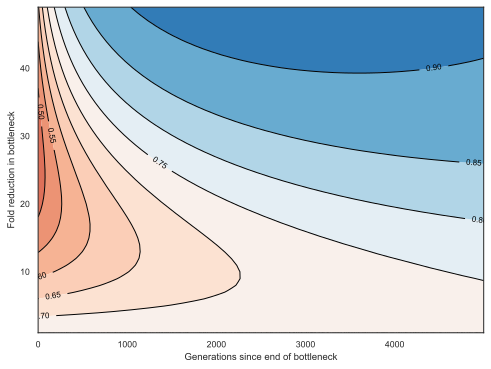

In [6]:
h = 0.75
N = 1e4 / 2
#f = 1 / np.arange(1, 500)
f = 1 / np.arange(1, 50)

bottle_len = 1000
bottle_end = np.arange(0, 5000)
g1 = bottle_end
g2 = bottle_len

def bottleneck(g1, f):
    return (2*N*h * (np.exp(-(f*g1+g2)/(2*N*h*f)) * \
                      (1 - f + np.exp(g2/(2*N*h*f)) * (f - 1 + np.exp(g1/(2*N*h)))))) / \
           (2*N*1 * (np.exp(-(f*g1+g2)/(2*N*1*f)) * \
                      (1 - f + np.exp(g2/(2*N*1*f)) * (f - 1 + np.exp(g1/(2*N*1))))))

gg, ff = np.meshgrid(g1, f, sparse=True)
z = bottleneck(gg, ff)

with sns.axes_style('white'):
    levels=np.arange(0, 1.1, 0.05)
    plt.contourf(g1, 1/f, z, cmap="RdBu", levels=levels, norm=MidpointNormalize(midpoint=0.75,vmin=0.25, vmax=1))
    CS = plt.contour(g1, 1/f, z, colors='k', linewidths=1, levels=levels)
    plt.clabel(CS, CS.levels, fmt='%.2f', fontsize=8)
    plt.ylabel("Fold reduction in bottleneck")
    plt.xlabel("Generations since end of bottleneck")